In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv('0407KMEANS_data.csv')

In [14]:
df.columns

Index(['Unnamed: 0', 'isca', 'AvgPrice', 'avgmiles', 'Salesefficiency',
       'AvgDaysToSell', 'inventory', 'revenue', 'profitability',
       'NGC_total_floored', 'wallet_share', 'count_vin', 'Velocity_Cold',
       'Velocity_Hot', 'Velocity_Warm', 'vol_tier_Tier1', 'vol_tier_Tier2',
       'vol_tier_Tier3', 'vol_tier_Tier4', 'vol_tier_Tier5',
       'availability_Excessive', 'availability_High', 'availability_Low',
       'availability_Medium', 'availability_No Inventory',
       'availability_Other', 'avg_year', 'make_count', 'Wholesale_dif',
       'Retail_dif', 'Avg_mileage_dif'],
      dtype='object')

In [15]:
df = df.drop('Unnamed: 0',axis=1)

In [16]:
df.shape

(109873, 30)

In [18]:
df = df.dropna()

In [54]:
pd.set_option('display.max_columns', None)
df.head()

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
0,1,10433.666667,84630.000000,0.624331,18.333333,234.333333,4.805000e+04,0.211238,0.0,0.0,3,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000,80.666667,3,0.210824,0.535095,-0.771830
1,1,29009.302128,33553.957447,0.503281,18.408511,282.646809,6.464402e+06,0.086799,0.0,0.0,242,0.202479,0.392562,0.376033,0.123967,0.152893,0.177686,0.409091,0.107438,0.433884,0.177686,0.053719,0.235537,0.000000,0.070248,84.619835,15,-0.069515,0.069385,-0.264682
2,1,56054.082781,26070.062914,0.647884,21.076159,42.979933,9.735923e+06,0.130765,0.0,0.0,331,0.057402,0.664653,0.160121,0.027190,0.018127,0.178248,0.274924,0.413897,0.015106,0.326284,0.129909,0.410876,0.009063,0.021148,83.752266,21,-0.195374,0.026491,-0.188768
3,1,4206.478873,128543.450704,0.595144,13.915493,101.171429,3.561250e+05,0.322148,0.0,0.0,71,0.042254,0.492958,0.450704,0.154930,0.084507,0.352113,0.169014,0.239437,0.000000,0.056338,0.239437,0.690141,0.014085,0.000000,75.422535,25,-0.168295,0.597379,0.036589
4,1,9144.500000,88761.500000,0.594674,13.500000,199.000000,1.940000e+04,0.072165,0.0,0.0,2,0.500000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,78.500000,2,-0.032205,1.121494,0.143964


In [55]:
df.shape

(102114, 30)

In [63]:
x = df.values

from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
x = mm_scaler.fit_transform(df)
mm_scaler.transform(x)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[ 1.00000000e+00, -2.65619719e-03, -3.71888463e-04, ...,
         2.12114883e-01,  1.39201559e-01,  1.31689384e-02],
       [ 1.00000000e+00, -2.65584144e-03, -3.72048780e-04, ...,
         2.02975543e-01,  1.32005632e-01,  1.32563639e-02],
       [ 1.00000000e+00, -2.65532349e-03, -3.72072270e-04, ...,
         1.98872417e-01,  1.31342855e-01,  1.32694504e-02],
       ...,
       [ 0.00000000e+00, -2.65633012e-03, -3.71781847e-04, ...,
         2.07407116e-01,  1.43350490e-01,  1.33058885e-02],
       [ 0.00000000e+00, -2.65630940e-03, -3.71746072e-04, ...,
         1.91168127e-01,  1.30258044e-01,  1.33803880e-02],
       [ 0.00000000e+00, -2.65636724e-03, -3.71736220e-04, ...,
         2.11439041e-01,  1.56359729e-01,  1.32329151e-02]])

In [64]:
dfa = pd.DataFrame(x)

In [65]:
dfa.columns = df.columns

In [66]:
dfa.head()

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
0,1.0,0.043004,0.149564,0.673539,0.061466,0.040251,0.000011,0.949687,0.0,0.0,0.000009,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000,0.865475,0.031250,0.211917,0.182972,0.002996
1,1.0,0.124296,0.059074,0.529810,0.061732,0.048585,0.001488,0.941749,0.0,0.0,0.001031,0.202479,0.392562,0.376033,0.123967,0.152893,0.177686,0.409091,0.107438,0.433884,0.177686,0.053719,0.235537,0.000000,0.070248,0.949443,0.218750,0.161300,0.125082,0.009654
2,1.0,0.242650,0.045815,0.701504,0.071192,0.007242,0.002240,0.944554,0.0,0.0,0.001412,0.057402,0.664653,0.160121,0.027190,0.018127,0.178248,0.274924,0.413897,0.015106,0.326284,0.129909,0.410876,0.012085,0.021148,0.931015,0.312500,0.138575,0.119750,0.010651
3,1.0,0.015752,0.227364,0.638884,0.045800,0.017280,0.000082,0.956762,0.0,0.0,0.000300,0.042254,0.492958,0.450704,0.154930,0.084507,0.352113,0.169014,0.239437,0.000000,0.056338,0.239437,0.690141,0.018779,0.000000,0.754085,0.375000,0.143465,0.190714,0.013610
4,1.0,0.037362,0.156883,0.638326,0.044326,0.034156,0.000004,0.940815,0.0,0.0,0.000004,0.500000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.819453,0.015625,0.168037,0.255864,0.015020


In [67]:
dfa.columns

Index(['isca', 'AvgPrice', 'avgmiles', 'Salesefficiency', 'AvgDaysToSell',
       'inventory', 'revenue', 'profitability', 'NGC_total_floored',
       'wallet_share', 'count_vin', 'Velocity_Cold', 'Velocity_Hot',
       'Velocity_Warm', 'vol_tier_Tier1', 'vol_tier_Tier2', 'vol_tier_Tier3',
       'vol_tier_Tier4', 'vol_tier_Tier5', 'availability_Excessive',
       'availability_High', 'availability_Low', 'availability_Medium',
       'availability_No Inventory', 'availability_Other', 'avg_year',
       'make_count', 'Wholesale_dif', 'Retail_dif', 'Avg_mileage_dif'],
      dtype='object')

In [68]:
dfa['popularity'] = 5 * dfa.vol_tier_Tier1 + 4 * dfa.vol_tier_Tier2 + 3 * dfa.vol_tier_Tier3 + 2 * dfa.vol_tier_Tier4 + 1 * dfa.vol_tier_Tier5
dfa['velocity'] = 3 * dfa.Velocity_Hot + 2 * dfa.Velocity_Warm + 1 * dfa.Velocity_Cold
dfa['availability'] = 5 * dfa['availability_No Inventory'] + 4 * dfa.availability_Low + 3 * dfa.availability_Medium + 2 * dfa.availability_High + 1 * dfa.availability_Excessive

In [69]:
x = dfa.values

from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
x = mm_scaler.fit_transform(dfa)
mm_scaler.transform(x)

array([[1.        , 0.04300398, 0.14956368, ..., 0.15388696, 0.22222222,
        0.11019284],
       [1.        , 0.12429565, 0.05907415, ..., 0.10076001, 0.2369146 ,
        0.05655351],
       [1.        , 0.24265045, 0.04581521, ..., 0.06088656, 0.26351125,
        0.08199546],
       ...,
       [0.        , 0.01262987, 0.20974176, ..., 0.11332948, 0.33333333,
        0.09917355],
       [0.        , 0.01736497, 0.22993517, ..., 0.15388696, 0.33333333,
        0.09917355],
       [0.        , 0.0041465 , 0.23549554, ..., 0.07277199, 0.22222222,
        0.09917355]])

In [70]:
dfa1 = pd.DataFrame(x)

In [71]:
dfa1.columns = dfa.columns

In [72]:
dfa1.head()

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif,popularity,velocity,availability
0,1.0,0.043004,0.149564,0.673539,0.061466,0.040251,0.000011,0.949687,0.0,0.0,0.000009,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000,0.865475,0.031250,0.211917,0.182972,0.002996,0.798611,0.666667,0.606061
1,1.0,0.124296,0.059074,0.529810,0.061732,0.048585,0.001488,0.941749,0.0,0.0,0.001031,0.202479,0.392562,0.376033,0.123967,0.152893,0.177686,0.409091,0.107438,0.433884,0.177686,0.053719,0.235537,0.000000,0.070248,0.949443,0.218750,0.161300,0.125082,0.009654,0.534808,0.710744,0.311044
2,1.0,0.242650,0.045815,0.701504,0.071192,0.007242,0.002240,0.944554,0.0,0.0,0.001412,0.057402,0.664653,0.160121,0.027190,0.018127,0.178248,0.274924,0.413897,0.015106,0.326284,0.129909,0.410876,0.012085,0.021148,0.931015,0.312500,0.138575,0.119750,0.010651,0.336816,0.790534,0.450975
3,1.0,0.015752,0.227364,0.638884,0.045800,0.017280,0.000082,0.956762,0.0,0.0,0.000300,0.042254,0.492958,0.450704,0.154930,0.084507,0.352113,0.169014,0.239437,0.000000,0.056338,0.239437,0.690141,0.018779,0.000000,0.754085,0.375000,0.143465,0.190714,0.013610,0.546166,0.807512,0.588135
4,1.0,0.037362,0.156883,0.638326,0.044326,0.034156,0.000004,0.940815,0.0,0.0,0.000004,0.500000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.819453,0.015625,0.168037,0.255864,0.015020,0.597222,0.500000,0.454545


In [151]:
dfa1['financial_risk'] = (dfa1.NGC_total_floored + dfa1.wallet_share) / 2
dfa1['vehicle_risk'] = ((1 - dfa1.AvgDaysToSell) + (1 - dfa1.inventory) + dfa1.popularity + dfa1.velocity + dfa1.availability + (1 - dfa1.Wholesale_dif)) / 6
dfa1['pricing_risk'] = (dfa1.Salesefficiency + dfa1.Retail_dif + dfa1.count_vin) / 3
dfa1['market_risk'] = ((1 - dfa1.AvgPrice) + dfa1.profitability + dfa1.avg_year + dfa1.make_count) / 4

In [152]:
dfa1.head()

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif,popularity,velocity,availability,financial_risk,vehicle_risk,pricing_risk,market_risk
0,1.0,0.043004,0.149564,0.673539,0.061466,0.040251,0.000011,0.949687,0.0,0.0,0.000009,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000,0.865475,0.031250,0.211917,0.182972,0.002996,0.798611,0.666667,0.606061,0.0,0.792951,0.285506,0.700852
1,1.0,0.124296,0.059074,0.529810,0.061732,0.048585,0.001488,0.941749,0.0,0.0,0.001031,0.202479,0.392562,0.376033,0.123967,0.152893,0.177686,0.409091,0.107438,0.433884,0.177686,0.053719,0.235537,0.000000,0.070248,0.949443,0.218750,0.161300,0.125082,0.009654,0.534808,0.710744,0.311044,0.0,0.714163,0.218641,0.746412
2,1.0,0.242650,0.045815,0.701504,0.071192,0.007242,0.002240,0.944554,0.0,0.0,0.001412,0.057402,0.664653,0.160121,0.027190,0.018127,0.178248,0.274924,0.413897,0.015106,0.326284,0.129909,0.410876,0.012085,0.021148,0.931015,0.312500,0.138575,0.119750,0.010651,0.336816,0.790534,0.450975,0.0,0.726886,0.274222,0.736355
3,1.0,0.015752,0.227364,0.638884,0.045800,0.017280,0.000082,0.956762,0.0,0.0,0.000300,0.042254,0.492958,0.450704,0.154930,0.084507,0.352113,0.169014,0.239437,0.000000,0.056338,0.239437,0.690141,0.018779,0.000000,0.754085,0.375000,0.143465,0.190714,0.013610,0.546166,0.807512,0.588135,0.0,0.789211,0.276632,0.767524
4,1.0,0.037362,0.156883,0.638326,0.044326,0.034156,0.000004,0.940815,0.0,0.0,0.000004,0.500000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.819453,0.015625,0.168037,0.255864,0.015020,0.597222,0.500000,0.454545,0.0,0.717542,0.298065,0.684633


In [233]:
dfb = dfa1.loc[:,['isca','financial_risk','vehicle_risk','pricing_risk','market_risk']]

In [154]:
dfb.shape

(102114, 5)

## Average Weight - Not with CA

In [155]:
df00 = dfb[dfb.isca == 0].dropna()

In [156]:
df00.head()

,isca,financial_risk,vehicle_risk,pricing_risk,market_risk
59231,0.0,0.0,0.758081,0.244773,0.826048
59232,0.0,0.0,0.751590,0.229707,0.759841
59233,0.0,0.0,0.757814,0.294010,0.736984
59234,0.0,0.0,0.792857,0.231390,0.695124
59235,0.0,0.0,0.607503,0.179599,0.601154


In [157]:
df00.shape

(42883, 5)

In [158]:
df00 = df00.drop(['isca','financial_risk'],axis=1)

In [159]:
x = df00.values

from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
x = mm_scaler.fit_transform(df00)
mm_scaler.transform(x)

array([[ 0.67810941,  0.70353191,  0.71167786],
       [ 0.66149787,  0.64038912,  0.36966871],
       [ 0.6774252 ,  0.90988533,  0.25159522],
       ...,
       [ 0.82313407,  1.01356708,  0.02033472],
       [ 0.94260613,  0.77790868,  0.01186578],
       [ 0.59826052,  1.21426466, -0.11356313]])

2
3
4
5
6
7
8
9


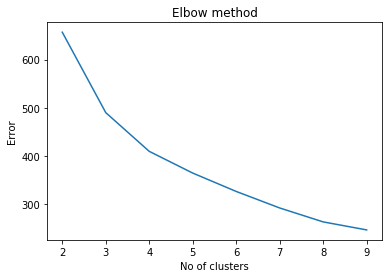

In [160]:
Error =[]
for i in range(2, 10):
    print(i)
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(2, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

2
3
4
5
6
7
8
9


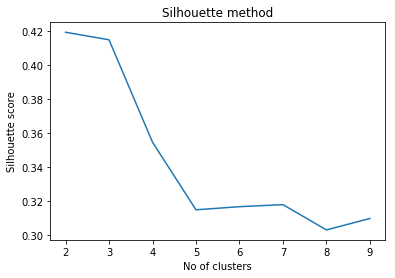

In [86]:
from sklearn.metrics import silhouette_score
Silhouette = []
for i in range(2,10):
    print(i)
    clusterer = KMeans(n_clusters = i)
    cluster_labels = clusterer.fit_predict(x)
    sil = silhouette_score(x, cluster_labels)
    Silhouette.append(sil)
    
plt.plot(range(2, 10), Silhouette)
plt.title('Silhouette method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [161]:
kmeansk = KMeans(n_clusters=3)
y_kmeansk = kmeansk.fit_predict(x)
print(y_kmeansk)

kmeansk.cluster_centers_

[0 0 1 ... 1 1 1]


array([[0.7115063 , 0.40553542, 0.66773553],
       [0.7736009 , 0.4475116 , 0.50884821],
       [0.5771826 , 0.32748431, 0.50664033]])

In [162]:
np.around(kmeansk.cluster_centers_, decimals=1)

array([[0.7, 0.4, 0.7],
       [0.8, 0.4, 0.5],
       [0.6, 0.3, 0.5]])

In [163]:
import collections, numpy
collections.Counter(y_kmeansk)

Counter({0: 8209, 1: 22452, 2: 12222})

In [165]:
result = pd.DataFrame(np.around(kmeansk.cluster_centers_,decimals=3))
result.columns = df00.columns
result

,vehicle_risk,pricing_risk,market_risk
0,0.712,0.406,0.668
1,0.774,0.448,0.509
2,0.577,0.327,0.507


In [166]:
result['counter'] = [8209,22452,12222]

In [167]:
result.to_csv('Aclustering_result00.csv')

In [168]:
df00['cluster'] = y_kmeansk

In [169]:
df00.head()

,vehicle_risk,pricing_risk,market_risk,cluster
59231,0.758081,0.244773,0.826048,0
59232,0.751590,0.229707,0.759841,0
59233,0.757814,0.294010,0.736984,1
59234,0.792857,0.231390,0.695124,1
59235,0.607503,0.179599,0.601154,2


In [170]:
df00.to_csv('Aclustering_data00.csv')

## Average Weight - with CA

In [171]:
df01 = dfb[dfb.isca == 1].dropna()

In [172]:
df01.head()

,isca,financial_risk,vehicle_risk,pricing_risk,market_risk
0,1.0,0.0,0.792951,0.285506,0.700852
1,1.0,0.0,0.714163,0.218641,0.746412
2,1.0,0.0,0.726886,0.274222,0.736355
3,1.0,0.0,0.789211,0.276632,0.767524
4,1.0,0.0,0.717542,0.298065,0.684633


In [173]:
df01.shape

(59231, 5)

In [174]:
df01 = df01.drop('isca',axis=1)

In [175]:
x = df01.values

from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
x = mm_scaler.fit_transform(df01)
mm_scaler.transform(x)

array([[0.        , 0.64228692, 0.77746112, 0.43751105],
       [0.        , 0.34305216, 0.54445379, 0.57790938],
       [0.        , 0.39137316, 0.73813892, 0.54691739],
       ...,
       [0.        , 0.63325939, 0.67752594, 0.43164298],
       [0.        , 0.47478873, 0.39108614, 0.38817116],
       [0.        , 0.78903772, 0.66136054, 0.35685074]])

2
3
4
5
6
7
8
9


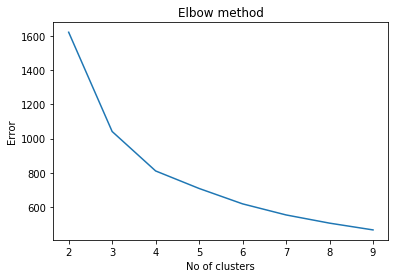

In [176]:
Error =[]
for i in range(2, 10):
    print(i)
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(2, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

2
3
4
5
6
7
8
9


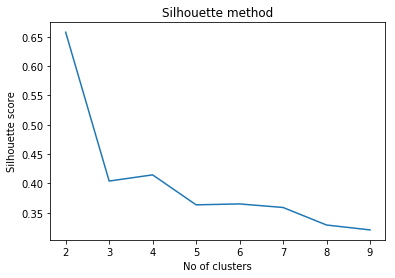

In [104]:
from sklearn.metrics import silhouette_score
Silhouette = []
for i in range(2,10):
    print(i)
    clusterer = KMeans(n_clusters = i)
    cluster_labels = clusterer.fit_predict(x)
    sil = silhouette_score(x, cluster_labels)
    Silhouette.append(sil)
    
plt.plot(range(2, 10), Silhouette)
plt.title('Silhouette method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [177]:
kmeansk = KMeans(n_clusters=4)
y_kmeansk = kmeansk.fit_predict(x)
print(y_kmeansk)

kmeansk.cluster_centers_

[0 3 2 ... 0 3 0]


array([[0.00964092, 0.74300961, 0.42849036, 0.61445848],
       [0.56564988, 0.72201298, 0.4094469 , 0.61493576],
       [0.00473093, 0.63396856, 0.38218513, 0.77422605],
       [0.00276256, 0.50624813, 0.33064625, 0.62910993]])

In [178]:
np.around(kmeansk.cluster_centers_, decimals=1)

array([[0. , 0.7, 0.4, 0.6],
       [0.6, 0.7, 0.4, 0.6],
       [0. , 0.6, 0.4, 0.8],
       [0. , 0.5, 0.3, 0.6]])

In [179]:
import collections, numpy
collections.Counter(y_kmeansk)

Counter({0: 27765, 3: 10994, 2: 15506, 1: 4966})

In [180]:
result = pd.DataFrame(np.around(kmeansk.cluster_centers_,decimals=3))
result.columns = df01.columns
result

,financial_risk,vehicle_risk,pricing_risk,market_risk
0,0.010,0.743,0.428,0.614
1,0.566,0.722,0.409,0.615
2,0.005,0.634,0.382,0.774
3,0.003,0.506,0.331,0.629


In [181]:
result['counter'] = [27765,4966,15506,10994]

In [182]:
result.to_csv('Aclustering_result01.csv')

In [183]:
df01['cluster'] = y_kmeansk

In [184]:
df01.head()

,financial_risk,vehicle_risk,pricing_risk,market_risk,cluster
0,0.0,0.792951,0.285506,0.700852,0
1,0.0,0.714163,0.218641,0.746412,3
2,0.0,0.726886,0.274222,0.736355,2
3,0.0,0.789211,0.276632,0.767524,0
4,0.0,0.717542,0.298065,0.684633,0


In [185]:
df01.to_csv('Aclustering_data01.csv')

## Market Downturn - Not with CA

In [307]:
dfc = dfb.copy()

In [309]:
dfc['market_risk'] = 10 * dfb.market_risk
dfc['pricing_risk'] = 4.5 * dfb.pricing_risk
dfc['vehicle_risk'] = 4.5 * dfb.vehicle_risk

In [310]:
dfc.head()

,isca,financial_risk,vehicle_risk,pricing_risk,market_risk
0,1.0,0.0,3.568278,1.284779,7.008520
1,1.0,0.0,3.213734,0.983885,7.464117
2,1.0,0.0,3.270987,1.234000,7.363547
3,1.0,0.0,3.551451,1.244846,7.675238
4,1.0,0.0,3.228937,1.341291,6.846328


In [311]:
df00 = dfc[dfc.isca == 0].dropna()

In [312]:
df00.head()

,isca,financial_risk,vehicle_risk,pricing_risk,market_risk
59231,0.0,0.0,3.411367,1.101478,8.260480
59232,0.0,0.0,3.382154,1.033680,7.598413
59233,0.0,0.0,3.410163,1.323044,7.369845
59234,0.0,0.0,3.567857,1.041254,6.951240
59235,0.0,0.0,2.733765,0.808197,6.011543


In [313]:
df00.shape

(42883, 5)

In [314]:
df00 = df00.drop(['isca','financial_risk'],axis=1)

In [315]:
x = df00.values

2
3
4
5
6
7
8
9


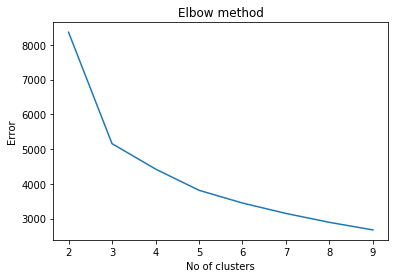

In [248]:
Error =[]
for i in range(2, 10):
    print(i)
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(2, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

2
3
4
5
6
7
8
9


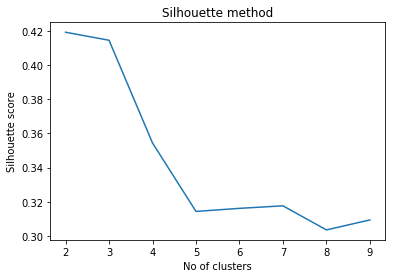

In [125]:
from sklearn.metrics import silhouette_score
Silhouette = []
for i in range(2,10):
    print(i)
    clusterer = KMeans(n_clusters = i)
    cluster_labels = clusterer.fit_predict(x)
    sil = silhouette_score(x, cluster_labels)
    Silhouette.append(sil)
    
plt.plot(range(2, 10), Silhouette)
plt.title('Silhouette method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [316]:
kmeansk = KMeans(n_clusters=3)
y_kmeansk = kmeansk.fit_predict(x)
print(y_kmeansk)

kmeansk.cluster_centers_

[1 1 1 ... 2 2 2]


array([[2.97624449, 0.95905345, 6.9852821 ],
       [3.35970805, 1.12658835, 7.70949067],
       [3.53723994, 1.20548651, 7.01268185]])

In [317]:
np.around(kmeansk.cluster_centers_, decimals=1)

array([[3. , 1. , 7. ],
       [3.4, 1.1, 7.7],
       [3.5, 1.2, 7. ]])

In [318]:
import collections, numpy
collections.Counter(y_kmeansk)

Counter({1: 8907, 2: 22514, 0: 11462})

In [319]:
result = pd.DataFrame(np.around(kmeansk.cluster_centers_,decimals=3))
result.columns = df00.columns
result

,vehicle_risk,pricing_risk,market_risk
0,2.976,0.959,6.985
1,3.360,1.127,7.709
2,3.537,1.205,7.013


In [320]:
result['counter'] = [11462,8907,22514]

In [321]:
result.to_csv('Bclustering_result00.csv')

In [322]:
df00['cluster'] = y_kmeansk

In [323]:
df00.head()

,vehicle_risk,pricing_risk,market_risk,cluster
59231,3.411367,1.101478,8.260480,1
59232,3.382154,1.033680,7.598413,1
59233,3.410163,1.323044,7.369845,1
59234,3.567857,1.041254,6.951240,2
59235,2.733765,0.808197,6.011543,0


In [324]:
df00.to_csv('Bclustering_data00.csv')

## Market Downturn - with CA

In [258]:
df01 = dfc[dfc.isca == 1].dropna()

In [259]:
df01.head()

,isca,financial_risk,vehicle_risk,pricing_risk,market_risk
0,1.0,0.0,3.964754,1.427532,7.008520
1,1.0,0.0,3.570816,1.093205,7.464117
2,1.0,0.0,3.634430,1.371111,7.363547
3,1.0,0.0,3.946057,1.383162,7.675238
4,1.0,0.0,3.587708,1.490323,6.846328


In [260]:
df01.shape

(59231, 5)

In [261]:
df01 = df01.drop('isca',axis=1)

In [262]:
x = df01.values

2
3
4
5
6
7
8
9


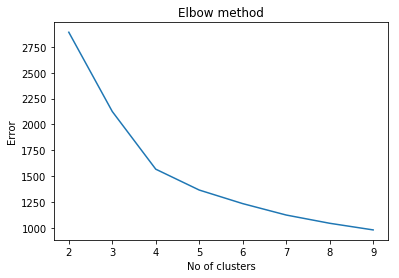

In [209]:
Error =[]
for i in range(2, 10):
    print(i)
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(2, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

2
3
4
5
6
7
8
9


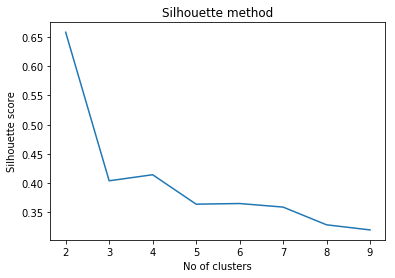

In [141]:
from sklearn.metrics import silhouette_score
Silhouette = []
for i in range(2,10):
    print(i)
    clusterer = KMeans(n_clusters = i)
    cluster_labels = clusterer.fit_predict(x)
    sil = silhouette_score(x, cluster_labels)
    Silhouette.append(sil)
    
plt.plot(range(2, 10), Silhouette)
plt.title('Silhouette method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [263]:
kmeansk = KMeans(n_clusters=4)
y_kmeansk = kmeansk.fit_predict(x)
print(y_kmeansk)

kmeansk.cluster_centers_

[1 0 0 ... 1 2 1]


array([[4.53871103e-02, 3.86277129e+00, 1.29041643e+00, 7.47521241e+00],
       [6.44534135e-02, 3.98037388e+00, 1.35581483e+00, 6.94898777e+00],
       [2.52994370e-02, 3.38786415e+00, 1.08678876e+00, 6.99571337e+00],
       [3.43046174e-03, 3.61990770e+00, 1.21154768e+00, 8.05511667e+00]])

In [264]:
np.around(kmeansk.cluster_centers_, decimals=1)

array([[0. , 3.9, 1.3, 7.5],
       [0.1, 4. , 1.4, 6.9],
       [0. , 3.4, 1.1, 7. ],
       [0. , 3.6, 1.2, 8.1]])

In [265]:
import collections, numpy
collections.Counter(y_kmeansk)

Counter({1: 23894, 0: 12209, 2: 9742, 3: 13386})

In [266]:
result = pd.DataFrame(np.around(kmeansk.cluster_centers_,decimals=3))
result.columns = df01.columns
result

,financial_risk,vehicle_risk,pricing_risk,market_risk
0,0.045,3.863,1.290,7.475
1,0.064,3.980,1.356,6.949
2,0.025,3.388,1.087,6.996
3,0.003,3.620,1.212,8.055


In [267]:
result['counter'] = [12209,23894,9742,13386]

In [268]:
result.to_csv('Bclustering_result01.csv')

In [269]:
df01['cluster'] = y_kmeansk

In [270]:
df01.head()

,financial_risk,vehicle_risk,pricing_risk,market_risk,cluster
0,0.0,3.964754,1.427532,7.008520,1
1,0.0,3.570816,1.093205,7.464117,0
2,0.0,3.634430,1.371111,7.363547,0
3,0.0,3.946057,1.383162,7.675238,0
4,0.0,3.587708,1.490323,6.846328,1


In [271]:
df01.to_csv('Bclustering_data01.csv')

## Market Uprise - Not with CA

In [272]:
dfc = dfb.copy()

In [273]:
dfc['market_risk'] = 1 * dfb.market_risk
dfc['pricing_risk'] = 2 * dfb.pricing_risk
dfc['vehicle_risk'] = 6 * dfb.vehicle_risk

In [274]:
dfc.head()

,isca,financial_risk,vehicle_risk,pricing_risk,market_risk
0,1.0,0.0,4.757705,0.571013,0.700852
1,1.0,0.0,4.284979,0.437282,0.746412
2,1.0,0.0,4.361316,0.548445,0.736355
3,1.0,0.0,4.735268,0.553265,0.767524
4,1.0,0.0,4.305249,0.596129,0.684633


In [275]:
df00 = dfc[dfc.isca == 0].dropna()

In [276]:
df00.head()

,isca,financial_risk,vehicle_risk,pricing_risk,market_risk
59231,0.0,0.0,4.548489,0.489546,0.826048
59232,0.0,0.0,4.509539,0.459413,0.759841
59233,0.0,0.0,4.546885,0.588020,0.736984
59234,0.0,0.0,4.757143,0.462779,0.695124
59235,0.0,0.0,3.645020,0.359199,0.601154


In [277]:
df00.shape

(42883, 5)

In [278]:
df00 = df00.drop(['isca','financial_risk'],axis=1)

In [279]:
x = df00.values

2
3
4
5
6
7
8
9


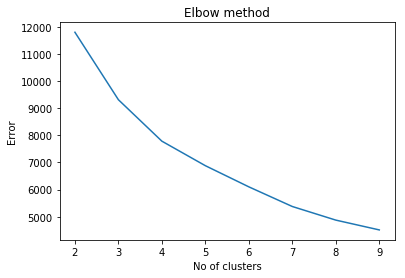

In [227]:
Error =[]
for i in range(2, 10):
    print(i)
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(2, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

2
3
4
5
6
7
8
9


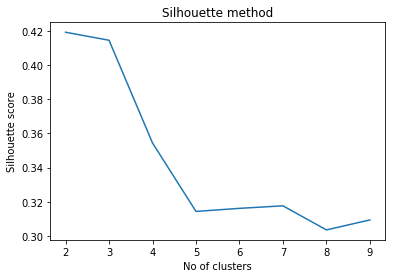

In [125]:
from sklearn.metrics import silhouette_score
Silhouette = []
for i in range(2,10):
    print(i)
    clusterer = KMeans(n_clusters = i)
    cluster_labels = clusterer.fit_predict(x)
    sil = silhouette_score(x, cluster_labels)
    Silhouette.append(sil)
    
plt.plot(range(2, 10), Silhouette)
plt.title('Silhouette method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [280]:
kmeansk = KMeans(n_clusters=3)
y_kmeansk = kmeansk.fit_predict(x)
print(y_kmeansk)

kmeansk.cluster_centers_

[0 0 0 ... 1 1 0]


array([[4.35589017, 0.48036557, 0.72016869],
       [4.79660407, 0.53898834, 0.71365685],
       [3.75811253, 0.42622445, 0.70689312]])

In [281]:
np.around(kmeansk.cluster_centers_, decimals=1)

array([[4.4, 0.5, 0.7],
       [4.8, 0.5, 0.7],
       [3.8, 0.4, 0.7]])

In [282]:
import collections, numpy
collections.Counter(y_kmeansk)

Counter({0: 15949, 1: 20095, 2: 6839})

In [284]:
result = pd.DataFrame(np.around(kmeansk.cluster_centers_,decimals=3))
result.columns = df00.columns
result

,vehicle_risk,pricing_risk,market_risk
0,4.356,0.480,0.720
1,4.797,0.539,0.714
2,3.758,0.426,0.707


In [285]:
result['counter'] = [15949,20095,6839]

In [291]:
result.to_csv('Cclustering_result00.csv')

In [287]:
df00['cluster'] = y_kmeansk

In [288]:
df00.head()

,vehicle_risk,pricing_risk,market_risk,cluster
59231,4.548489,0.489546,0.826048,0
59232,4.509539,0.459413,0.759841,0
59233,4.546885,0.588020,0.736984,0
59234,4.757143,0.462779,0.695124,1
59235,3.645020,0.359199,0.601154,2


In [292]:
df00.to_csv('Cclustering_data00.csv')

## Market Uprise - with CA

In [293]:
df01 = dfc[dfc.isca == 1].dropna()

In [294]:
df01.head()

,isca,financial_risk,vehicle_risk,pricing_risk,market_risk
0,1.0,0.0,4.757705,0.571013,0.700852
1,1.0,0.0,4.284979,0.437282,0.746412
2,1.0,0.0,4.361316,0.548445,0.736355
3,1.0,0.0,4.735268,0.553265,0.767524
4,1.0,0.0,4.305249,0.596129,0.684633


In [295]:
df01.shape

(59231, 5)

In [296]:
df01 = df01.drop('isca',axis=1)

In [297]:
x = df01.values

2
3
4
5
6
7
8
9


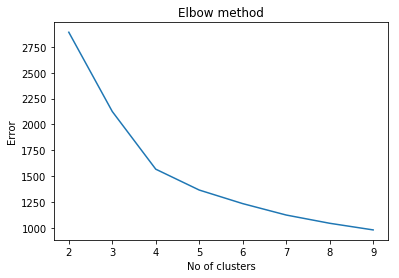

In [209]:
Error =[]
for i in range(2, 10):
    print(i)
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(2, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

2
3
4
5
6
7
8
9


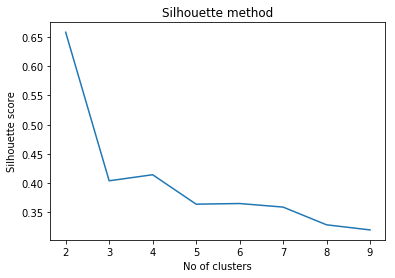

In [141]:
from sklearn.metrics import silhouette_score
Silhouette = []
for i in range(2,10):
    print(i)
    clusterer = KMeans(n_clusters = i)
    cluster_labels = clusterer.fit_predict(x)
    sil = silhouette_score(x, cluster_labels)
    Silhouette.append(sil)
    
plt.plot(range(2, 10), Silhouette)
plt.title('Silhouette method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [298]:
kmeansk = KMeans(n_clusters=4)
y_kmeansk = kmeansk.fit_predict(x)
print(y_kmeansk)

kmeansk.cluster_centers_

[1 0 0 ... 1 0 1]


array([[0.00628112, 4.40321859, 0.48927232, 0.74927338],
       [0.00862132, 4.82426702, 0.53983087, 0.71833285],
       [0.01205902, 3.87944773, 0.43982049, 0.73491483],
       [0.42908477, 4.74166953, 0.5246167 , 0.70780048]])

In [299]:
np.around(kmeansk.cluster_centers_, decimals=1)

array([[0. , 4.4, 0.5, 0.7],
       [0. , 4.8, 0.5, 0.7],
       [0. , 3.9, 0.4, 0.7],
       [0.4, 4.7, 0.5, 0.7]])

In [300]:
import collections, numpy
collections.Counter(y_kmeansk)

Counter({1: 24342, 0: 22494, 2: 7870, 3: 4525})

In [301]:
result = pd.DataFrame(np.around(kmeansk.cluster_centers_,decimals=3))
result.columns = df01.columns
result

,financial_risk,vehicle_risk,pricing_risk,market_risk
0,0.006,4.403,0.489,0.749
1,0.009,4.824,0.540,0.718
2,0.012,3.879,0.440,0.735
3,0.429,4.742,0.525,0.708


In [302]:
result['counter'] = [22494,24342,7870,4525]

In [303]:
result.to_csv('Cclustering_result01.csv')

In [304]:
df01['cluster'] = y_kmeansk

In [305]:
df01.head()

,financial_risk,vehicle_risk,pricing_risk,market_risk,cluster
0,0.0,4.757705,0.571013,0.700852,1
1,0.0,4.284979,0.437282,0.746412,0
2,0.0,4.361316,0.548445,0.736355,0
3,0.0,4.735268,0.553265,0.767524,1
4,0.0,4.305249,0.596129,0.684633,0


In [306]:
df01.to_csv('Cclustering_data01.csv')